# Import Dependencies

In [27]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

%matplotlib inline

# Load data

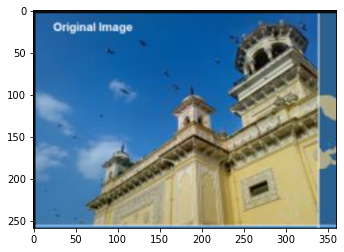

In [28]:
img = cv2.imread("Image1.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [29]:
img.shape

(259, 361, 3)

In [30]:
img2 = img.reshape((-1, 3))
img2 = np.float32(img2)

In [31]:
img2.shape

(93499, 3)

# K-Means

criteria : It is the iteration termination criteria. When this criteria is satisfied, algorithm iteration stops. Actually, it should be a tuple of 3 parameters. They are `( type, max_iter, epsilon )`:
* type of termination criteria. It has 3 flags as below:
  * cv.TERM_CRITERIA_EPS - stop the algorithm iteration if specified accuracy, epsilon, is reached.
  * cv.TERM_CRITERIA_MAX_ITER - stop the algorithm after the specified number of iterations, max_iter.
  * cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER - stop the iteration when any of the above condition is met.
* max_iter - An integer specifying maximum number of iterations.
* epsilon - Required accuracy

In [32]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
k = 2
attempts = 10

cv2.kmeans outputs 2 parameters.
1. Compactness. 
2. Labels: Label array.
3. Center. the array of centers of clusters. For k=4 we will have 4 centers.

In [33]:
ret, label, center = cv2.kmeans(
    img2, k, None, criteria, attempts, cv2.KMEANS_PP_CENTERS
)

In [34]:
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

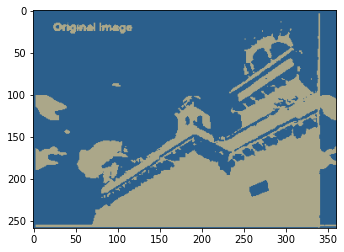

In [35]:
plt.imshow(cv2.cvtColor(res2, cv2.COLOR_BGR2RGB))

In [36]:
cv2.imwrite("segmented.jpg", res2)

True